In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Train_data=pd.read_excel('FoodCost_train.xlsx')
Test_data=pd.read_excel('FoodCost_test.xlsx')

In [3]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
Train_data.shape

(12690, 9)

# Train Data

In [6]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [7]:
Train_data.shape

(12690, 9)

In [8]:
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [9]:
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [10]:
Train_data.duplicated().sum()

25

In [11]:
Train_data.drop_duplicates(inplace=True)

In [12]:
Train_data.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

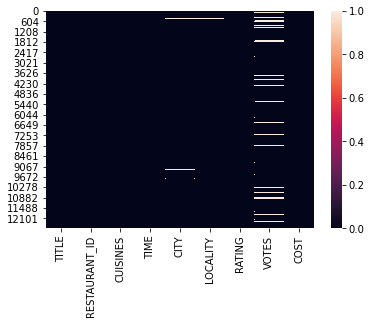

In [13]:
sns.heatmap(Train_data.isnull())

In [14]:
Train_data['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [15]:
Train_data["CITY"].fillna(Train_data["CITY"].mode()[0], inplace=True)

In [16]:
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [17]:
Train_data["LOCALITY"].fillna(Train_data["LOCALITY"].mode()[0], inplace=True)

In [18]:
Train_data["VOTES"].fillna(Train_data["VOTES"].mode()[0], inplace=True)

In [19]:
Train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           2
VOTES            0
COST             0
dtype: int64

In [20]:
Train_data["RATING"].fillna(Train_data["RATING"].mode()[0], inplace=True)

In [21]:
Train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

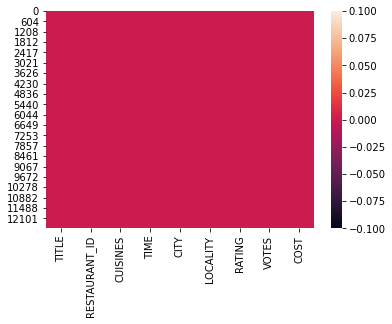

In [22]:
sns.heatmap(Train_data.isnull())

In [23]:
Train_data.shape

(12665, 9)

In [24]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12665 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12665 non-null  object
 1   RESTAURANT_ID  12665 non-null  int64 
 2   CUISINES       12665 non-null  object
 3   TIME           12665 non-null  object
 4   CITY           12665 non-null  object
 5   LOCALITY       12665 non-null  object
 6   RATING         12665 non-null  object
 7   VOTES          12665 non-null  object
 8   COST           12665 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 989.5+ KB


# Summary Statistics

In [25]:
Train_data.describe()

,RESTAURANT_ID,COST
count,12665.000000,12665.000000
mean,7757.774734,655.400790
std,4506.166393,627.389831
min,0.000000,20.000000
25%,3861.000000,300.000000
50%,7739.000000,500.000000
75%,11689.000000,800.000000
max,15573.000000,14000.000000


# Exploratory Data Analysis

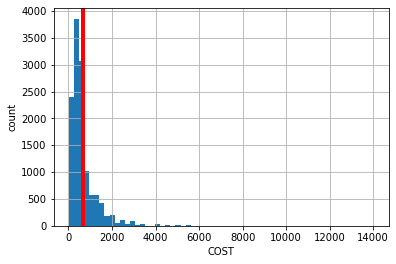

In [26]:
#Checking the mean Cost

cost=Train_data['COST'].hist(bins=60)
mean_val=np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean cost')
plt.xlabel('COST')
plt.ylabel('count')
plt.show()


In [27]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [28]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [29]:
#Need to convert Votes into integer value

Train_data['TOTAL_VOTES']=Train_data['VOTES'].str.slice(stop=2).astype(int)

In [30]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TOTAL_VOTES
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,22
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,16


In [31]:
#Need to drop VOTES column

Train_data.drop(['VOTES'],axis=1, inplace=True)

In [32]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,TOTAL_VOTES
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,22
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,16


In [33]:
#Need to specify the CUISINES into individual CUISINES columns

cuisines_list=[]
for row in Train_data['CUISINES']:
    cuisines_list.append(list(row.split(',')))

Train_data['CUISINES']=cuisines_list

Train_data_cuisines=Train_data['CUISINES'].apply(lambda x: pd.Series(1, x))


Train_data_cuisines.head()

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Irish,Multi Cuisine,Jewish,Vegan,Oriental,Assamese,Modern Australian,Roast Chicken,Singaporean,Egyptian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,TOTAL_VOTES
0,CASUAL DINING,9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,"CASUAL DINING,BAR",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,CASUAL DINING,10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,22
3,QUICK BITES,6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,DESSERT PARLOR,15387,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,16


In [35]:
#Now dropping CUISINES column

Train_data.drop(['CUISINES'],axis=1, inplace=True)

In [36]:
title_list=[]
for row in Train_data['TITLE']:
    title_list.append(list(row.split(',')))
Train_data['TITLE']=title_list


Train_data_title=Train_data['TITLE'].apply(lambda x: pd.Series(1, x))

Train_data_title.head(15)

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
Train_data.head()

,TITLE,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,COST,TOTAL_VOTES
0,[CASUAL DINING],9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,"[CASUAL DINING, BAR]",13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,[CASUAL DINING],10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,22
3,[QUICK BITES],6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,[DESSERT PARLOR],15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,16


In [38]:
Train_data.drop(columns='TITLE',inplace=True)

In [39]:
Train_data.head()

,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,COST,TOTAL_VOTES
0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,22
3,6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,16


In [40]:
Train_data.drop(columns='TIME',inplace=True)

In [41]:
Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,COST,TOTAL_VOTES
0,9438,Thane,Dombivali East,3.6,1200,49
1,13198,Chennai,Ramapuram,4.2,1500,30
2,10915,Chennai,Saligramam,3.8,800,22
3,6346,Mumbai,Bandra West,4.1,800,24
4,15387,Mumbai,Lower Parel,3.8,300,16


# Rating vs Cost

In [42]:
Train_data['RATING'].value_counts()

3.9    1235
3.8    1187
4.0    1094
3.7    1086
3.6     951
4.1     933
3.5     768
4.2     723
NEW     704
3.4     574
4.3     556
-       494
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      68
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

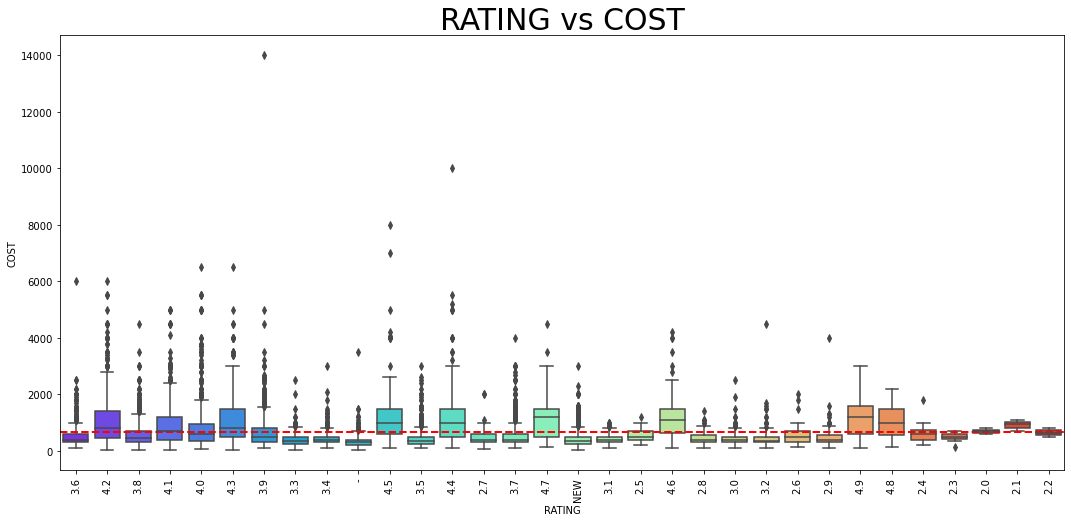

In [43]:
#RATING vs COST

plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['COST'])
sns.boxplot(y='COST',x='RATING',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("RATING vs COST" ,fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

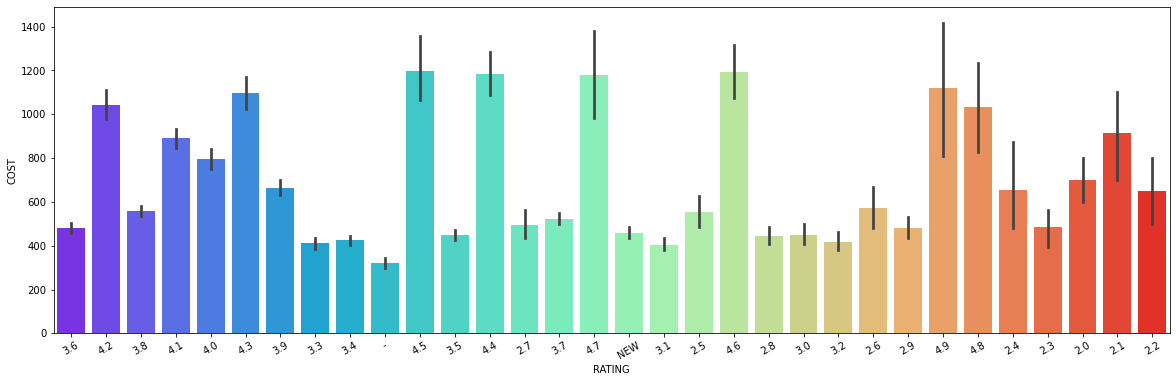

In [44]:
plt.figure(figsize=(20,6))
sns.barplot(x='RATING',y='COST',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

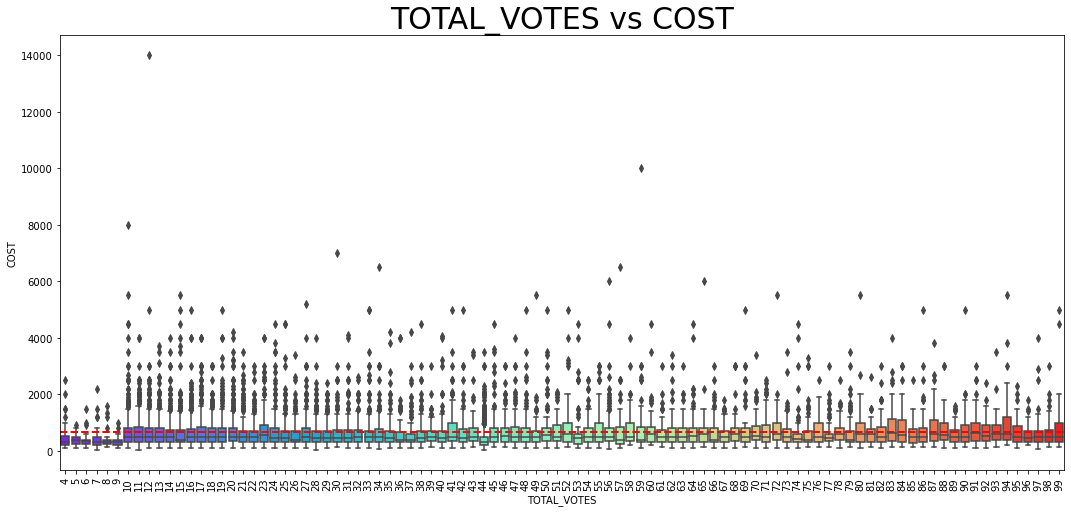

In [45]:
#TOTAL_VOTES vs COST

plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['COST'])
sns.boxplot(y='COST',x='TOTAL_VOTES',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("TOTAL_VOTES vs COST" ,fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

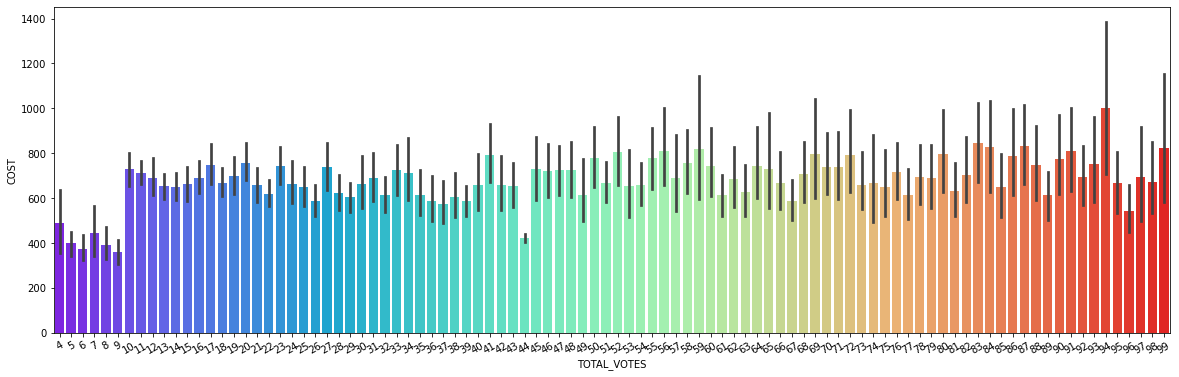

In [46]:
plt.figure(figsize=(20,6))
sns.barplot(x='TOTAL_VOTES',y='COST',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

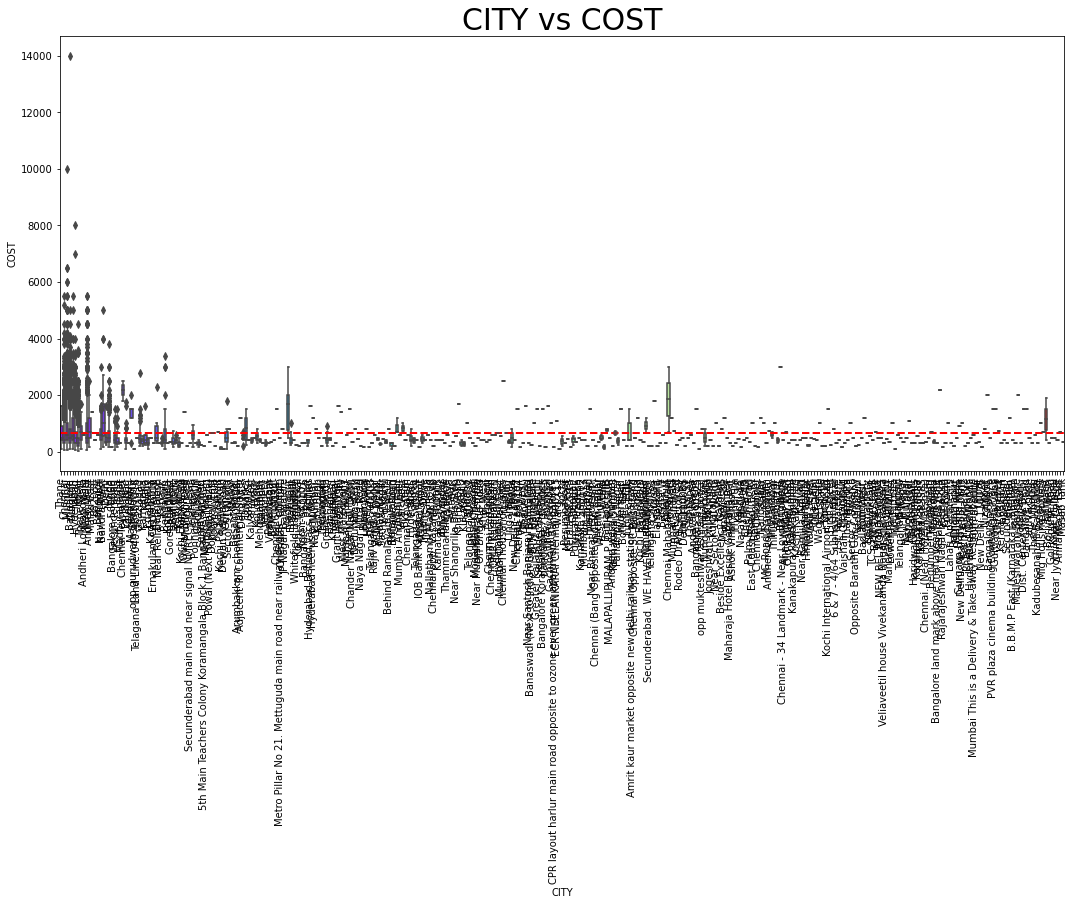

In [47]:
#CITY vs COST
Train_data['CITY'].value_counts()

plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['COST'])
sns.boxplot(y='COST',x='CITY',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("CITY vs COST" ,fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
#LOCALITY vs COST

Train_data['LOCALITY'].value_counts()

Gachibowli                264
Indiranagar               137
Edappally                 122
Kakkanad                  121
HSR                       119
                         ... 
Kerala 682021               1
shop 7 shikrupa socity      1
DLF Phase 5                 1
Sector 80                   1
Gurugram                    1
Name: LOCALITY, Length: 1416, dtype: int64

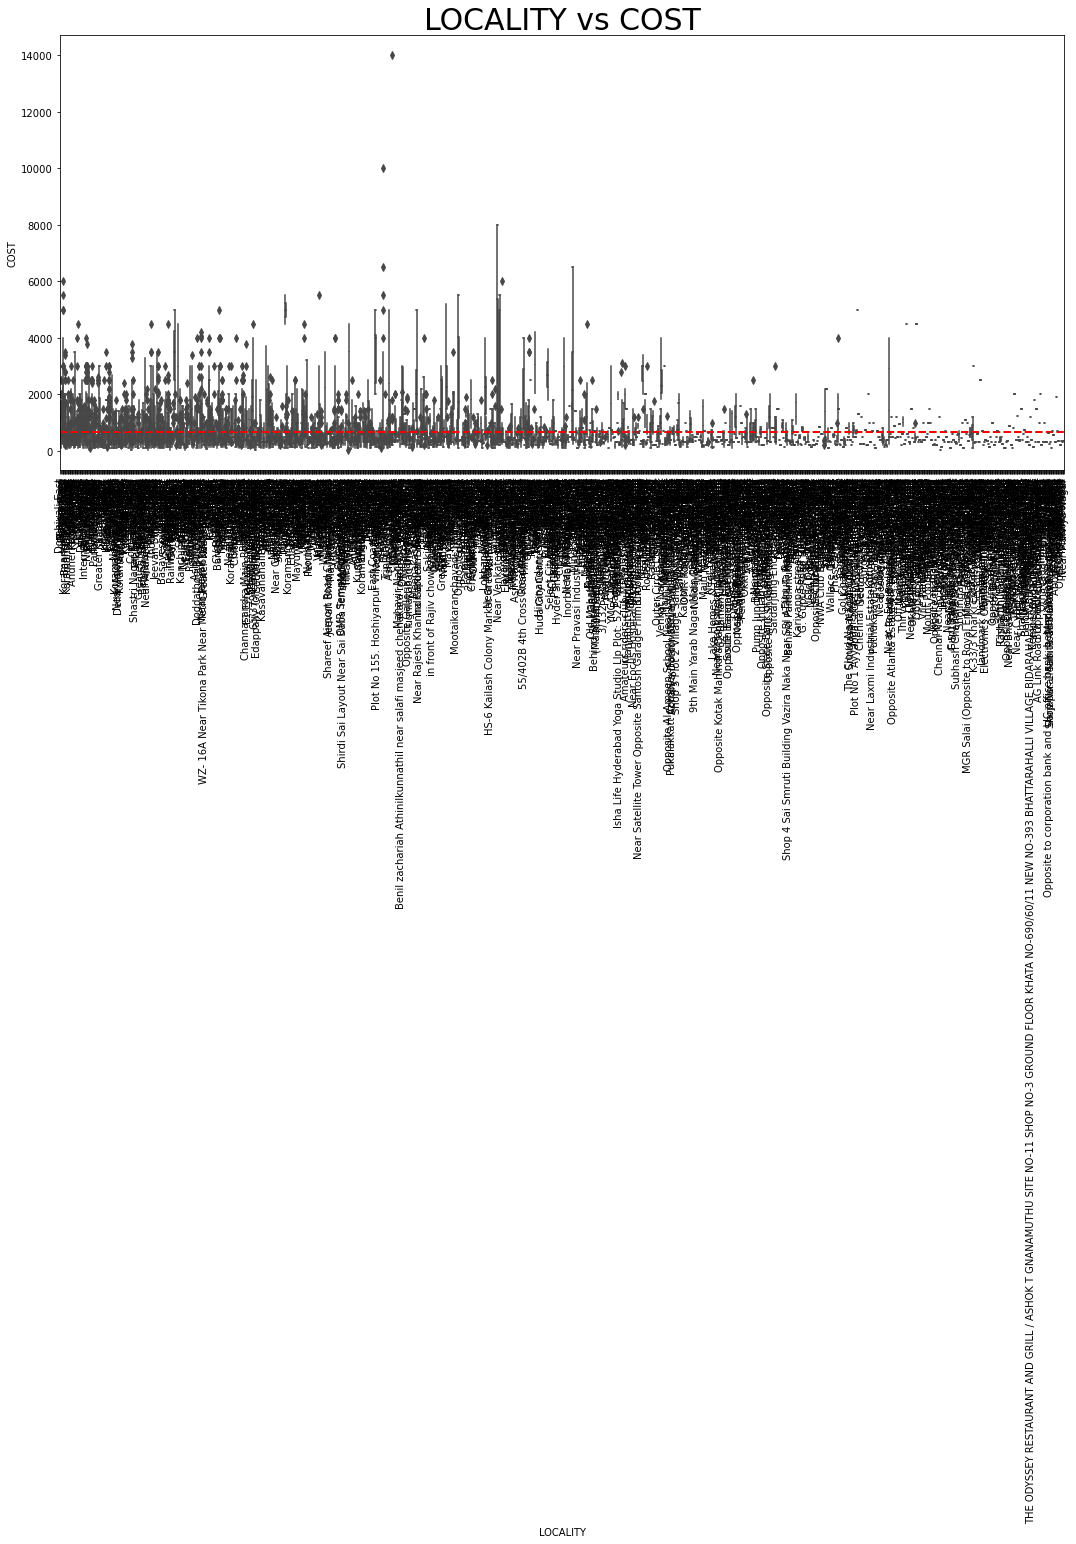

In [49]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['COST'])
sns.boxplot(y='COST',x='LOCALITY',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("LOCALITY vs COST" ,fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

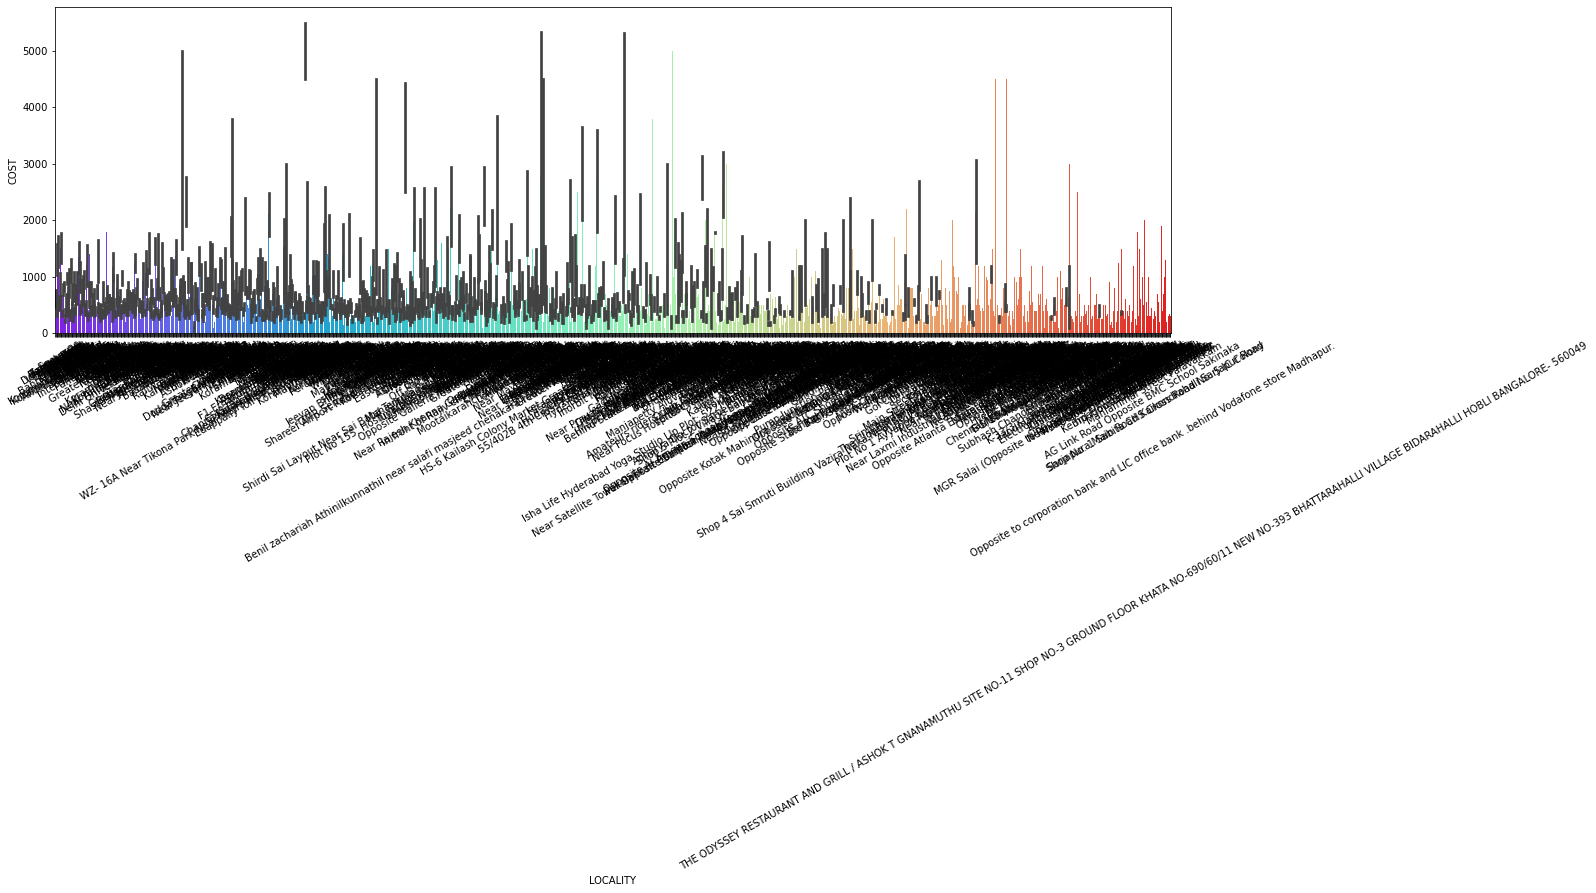

In [50]:
plt.figure(figsize=(20,6))
sns.barplot(x='LOCALITY',y='COST',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

# Handling Categorical Data

In [51]:
#Adding CUISINES & TITLE data into Train data set

Train_final= pd.concat([Train_data,Train_data_cuisines,Train_data_title], axis=1)

In [52]:
Train_final.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,COST,TOTAL_VOTES,Malwani,Goan,North Indian,Asian,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,9438,Thane,Dombivali East,3.6,1200,49,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13198,Chennai,Ramapuram,4.2,1500,30,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10915,Chennai,Saligramam,3.8,800,22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6346,Mumbai,Bandra West,4.1,800,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15387,Mumbai,Lower Parel,3.8,300,16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
##Now need to convert Categorical data into Numerical format

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['CITY','LOCALITY']
for val in list1:
    Train_final[val]=le.fit_transform(Train_data[val].astype(str))

In [54]:
Train_final.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,COST,TOTAL_VOTES,Malwani,Goan,North Indian,Asian,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,9438,320,285,3.6,1200,49,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13198,67,1046,4.2,1500,30,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10915,67,1101,3.8,800,22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6346,222,136,4.1,800,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15387,222,620,3.8,300,16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
Train_final.shape

(12665, 250)

# Now all data are in Numeric Format. Same steps need to be followed for Test Data

In [56]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [57]:
Test_data.shape

(4231, 8)

In [58]:
#Preprocessing

Test_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [59]:
Test_data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

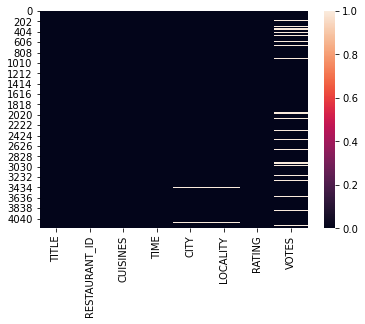

In [60]:
sns.heatmap(Test_data.isnull())

In [61]:
Test_data["CITY"].fillna(Test_data["CITY"].mode()[0], inplace=True)

In [62]:
Test_data["LOCALITY"].fillna(Test_data["LOCALITY"].mode()[0], inplace=True)

In [63]:
Test_data["VOTES"].fillna(Test_data["VOTES"].mode()[0], inplace=True)

In [64]:
Test_data["RATING"].fillna(Test_data["RATING"].mode()[0], inplace=True)

In [65]:
Test_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

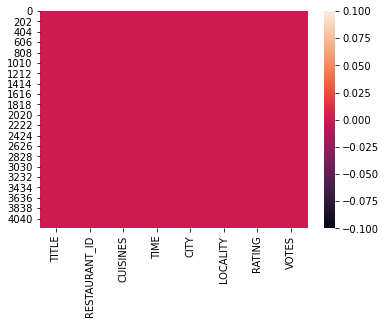

In [66]:
sns.heatmap(Test_data.isnull())

In [67]:
#EDA

Test_data['TOTAL_VOTES']=Test_data['VOTES'].str.slice(stop=2).astype(int)
Test_data.drop(['VOTES'],axis=1, inplace=True)


cuisines_list=[]
for row in Test_data['CUISINES']:
    cuisines_list.append(list(row.split(',')))

Test_data['CUISINES']=cuisines_list

Test_data_cuisines=Test_data['CUISINES'].apply(lambda x: pd.Series(1, x))


Test_data_cuisines.head()


,North Indian,Chinese,Mughlai,Kebab,South Indian,Fast Food,Pizza,North Indian,Seafood,Biryani,...,Naga,Vietnamese,Singaporean,Kashmiri,Vegan,Oriental,Drinks Only,Malaysian,Kashmiri,Sindhi
0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#Dropping CUISINES column

Test_data.drop(['CUISINES'],axis=1, inplace=True)

In [69]:
title_list=[]
for row in Test_data['TITLE']:
    title_list.append(list(row.split(',')))
Test_data['TITLE']=title_list


Test_data_title=Test_data['TITLE'].apply(lambda x: pd.Series(1, x))

Test_data_title.head()
Test_data.drop(columns='TITLE',inplace=True)

In [70]:
Test_data.drop(['TIME'], axis=1 ,inplace=True)

In [71]:
Test_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,TOTAL_VOTES
0,4085,Noida,Sector 18,4.3,56
1,12680,Mumbai,Grant Road,4.2,61
2,1411,Mumbai,Marine Lines,3.8,35
3,204,Faridabad,NIT,3.8,14
4,13453,Kochi,Kaloor,3.6,23


In [72]:
Test_final= pd.concat([Test_data,Test_data_cuisines,Test_data_title], axis=1)

In [73]:
Test_final.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,TOTAL_VOTES,North Indian,Chinese,Mughlai,Kebab,South Indian,...,FOOD COURT,KIOSK,MESS,MICROBREWERY,CLUB,COCKTAIL BAR,MEAT SHOP,CONFECTIONERY,PAAN SHOP,BHOJANALYA
0,4085,Noida,Sector 18,4.3,56,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12680,Mumbai,Grant Road,4.2,61,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1411,Mumbai,Marine Lines,3.8,35,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,204,Faridabad,NIT,3.8,14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13453,Kochi,Kaloor,3.6,23,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
Test_final.shape

(4231, 218)

In [75]:
##Now need to convert Categorical data into Numerical format

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['CITY','LOCALITY']
for val in list1:
    Test_final[val]=le.fit_transform(Test_data[val].astype(str))

In [76]:
Test_final.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,TOTAL_VOTES,North Indian,Chinese,Mughlai,Kebab,South Indian,...,FOOD COURT,KIOSK,MESS,MICROBREWERY,CLUB,COCKTAIL BAR,MEAT SHOP,CONFECTIONERY,PAAN SHOP,BHOJANALYA
0,4085,110,662,4.3,56,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12680,96,221,4.2,61,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1411,96,411,3.8,35,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,204,41,456,3.8,14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13453,78,300,3.6,23,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
Train_final.shape

(12665, 250)

In [78]:
Test_final.shape

(4231, 218)

In [79]:
Train_data.describe()

,RESTAURANT_ID,COST,TOTAL_VOTES
count,12665.000000,12665.000000,12665.000000
mean,7757.774734,655.400790,38.431820
std,4506.166393,627.389831,23.586026
min,0.000000,20.000000,4.000000
25%,3861.000000,300.000000,18.000000
50%,7739.000000,500.000000,35.000000
75%,11689.000000,800.000000,52.000000
max,15573.000000,14000.000000,99.000000


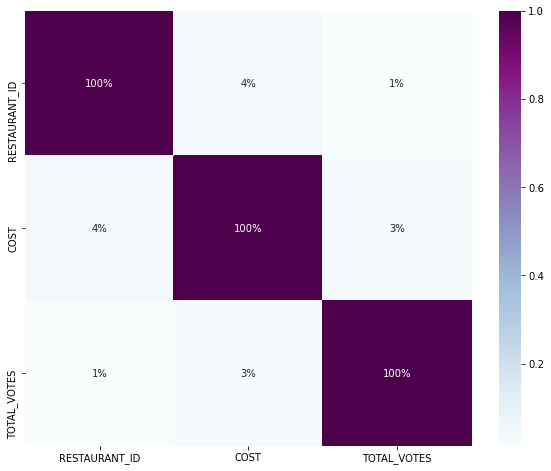

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(), annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Correlation with Target Variable')

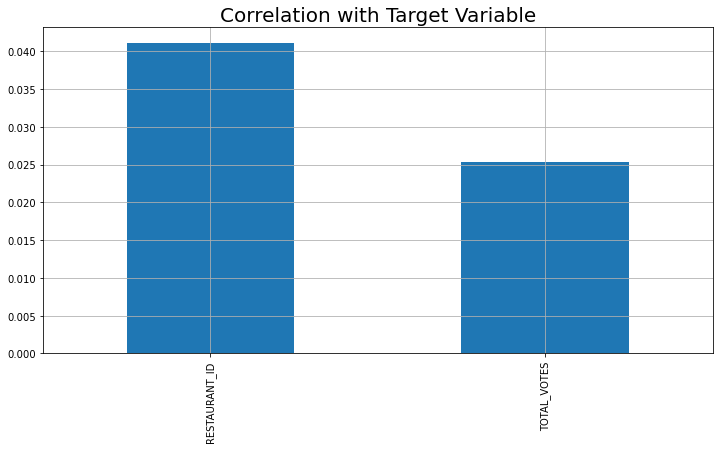

In [81]:
#Correlation with target column

plt.figure(figsize=(12,6))
Train_data.drop('COST',axis=1).corrwith(Train_data['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable", fontsize=20)